In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import os

import numpy as np
import pandas as pd

import statsmodels.stats.power as power

import utils


In [2]:
out_dir = '../writing/kdd/'

In [3]:
os.system('python simulations.py')

0

In [4]:
main_df = pd.read_csv('ttest_main_df.csv')

In [7]:
main_df['Theoretical Power'] = power.tt_solve_power(main_df['True Effect Size'], np.array(main_df['Sample Budget'],dtype=int), main_df['Simulated Alpha'], None)

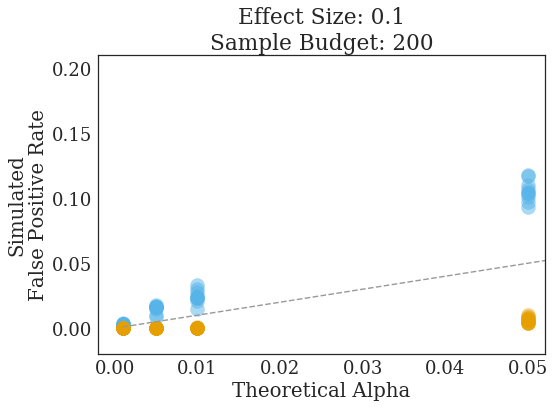

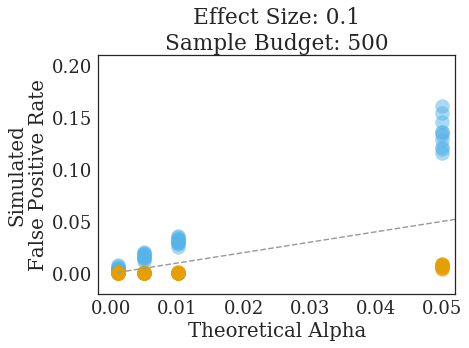

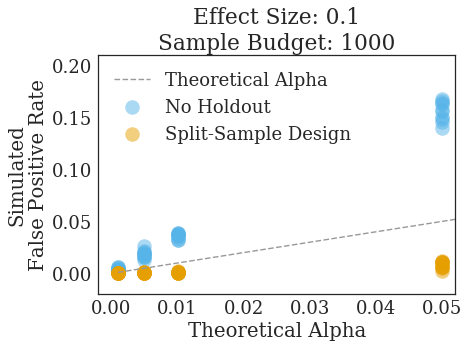

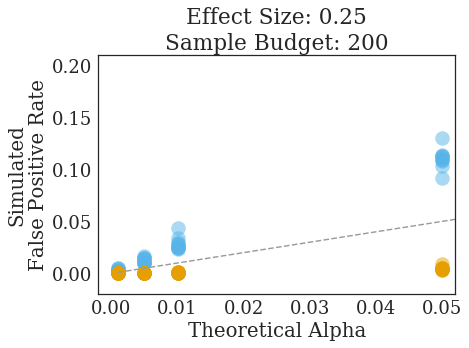

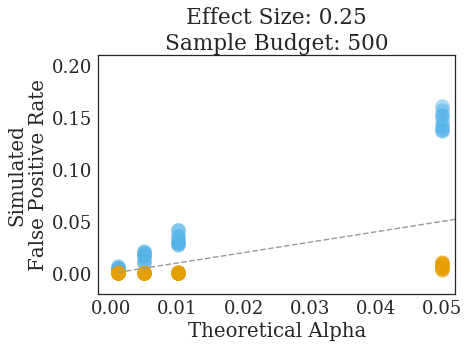

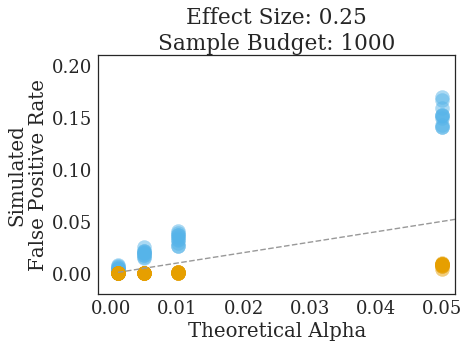

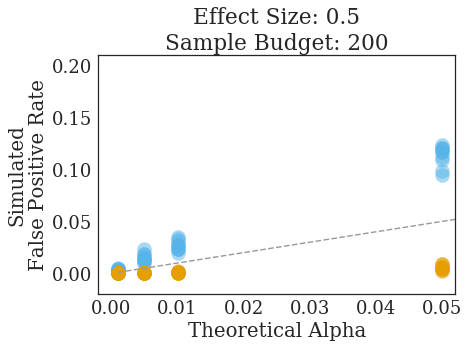

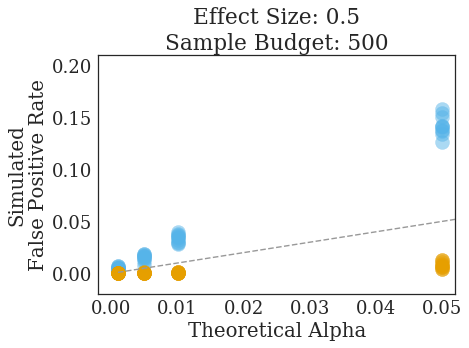

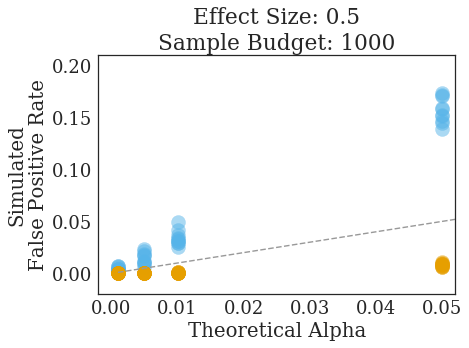

In [8]:

ind = 0

for e in sorted(set(main_df['True Effect Size'])):
    for b in sorted(set(main_df['Sample Budget'])):
       
        ind += 1
    
        plt.figure()
        sns.set(context = 'paper', font_scale = 2.25, font='serif', style = 'white')
        
        inds = (main_df['True Effect Size'] == e)
        inds &= (main_df['Sample Budget'] == b)
        inds &= (main_df['Theoretical Alpha'] <= 0.05)
        sub = main_df[inds] 
        plt.scatter(sub['Theoretical Alpha'], sub['Simulated Alpha'], c = 'white', s = 200, alpha = 0.5, label = '')

                
        inds = (main_df['True Effect Size'] == e)
        inds &= (main_df['Sample Budget'] == b)
        inds &= (main_df['Theoretical Alpha'] <= 0.1)
        sub = main_df[inds] 
        inds = np.argsort(sub['Theoretical Alpha'])
        plt.plot(sub['Theoretical Alpha'].iloc[inds], sub['Theoretical Alpha'].iloc[inds], linestyle = '--', c = '#999999', alpha = 1, label = 'Theoretical Alpha')
        
        
        inds = (main_df['True Effect Size'] == e)
        inds &= (main_df['Sample Budget'] == b)
        inds &= (main_df['Theoretical Alpha'] <= 0.05)
        inds &= (main_df['Holdout'] == 0)
        sub = main_df[inds] 
        plt.scatter(sub['Theoretical Alpha'], sub['Simulated Alpha'], c = '#56B4E9', s = 200, alpha = 0.5, label = 'No Holdout')
        
        inds = (main_df['True Effect Size'] == e)
        inds &= (main_df['Sample Budget'] == b)
        inds &= (main_df['Theoretical Alpha'] <= 0.05)
        inds &= (main_df['Holdout'] == 1)
        sub = main_df[inds] 
        plt.scatter(sub['Theoretical Alpha'], sub['Simulated Alpha'], c = '#E69F00', s = 200, alpha = 0.5, label = 'Split-Sample Design')
        
        plt.xlim((-0.002,0.052))
        plt.ylim((-0.02,0.21))
        plt.xlabel('Theoretical Alpha')
        plt.ylabel('Simulated\nFalse Positive Rate')
        plt.title('Effect Size: ' + str(e) + '\nSample Budget: ' + str(b))
        
        if ind == 3:
            plt.legend()
        
        plt.savefig(out_dir + 'fpr-' + str(ind) + '.jpg', bbox_inches = 'tight')


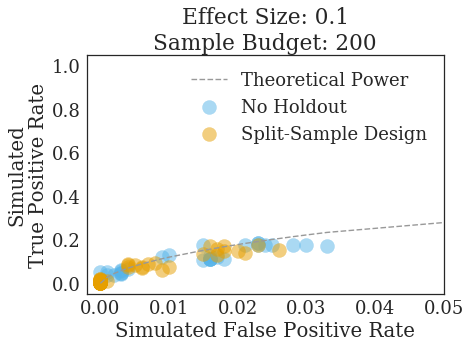

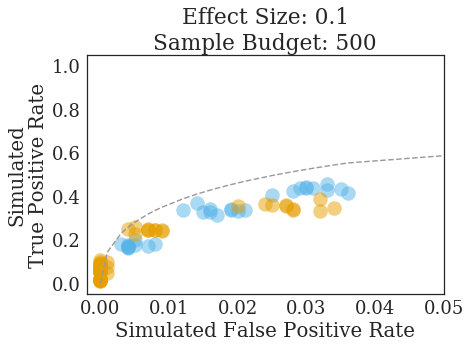

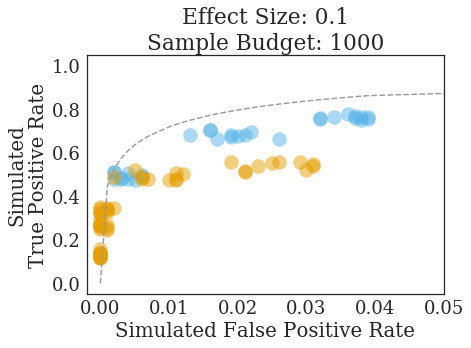

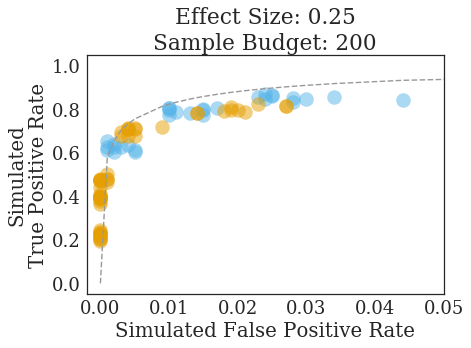

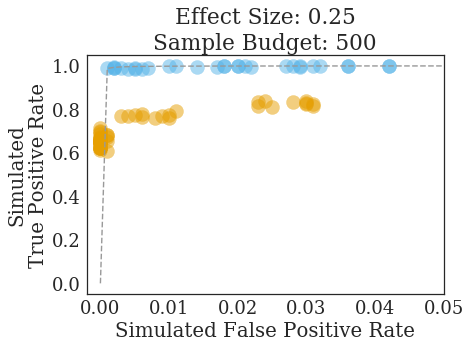

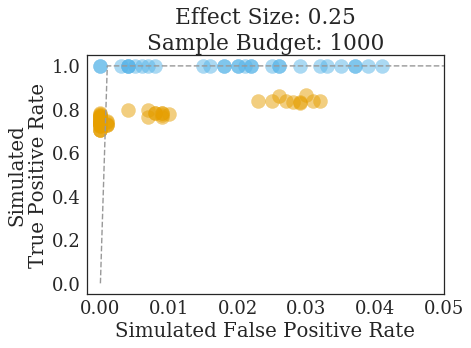

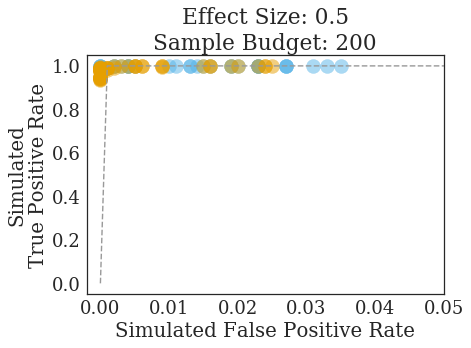

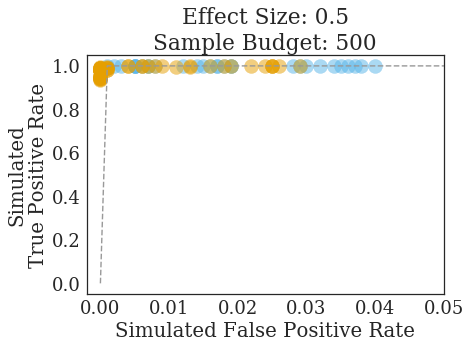

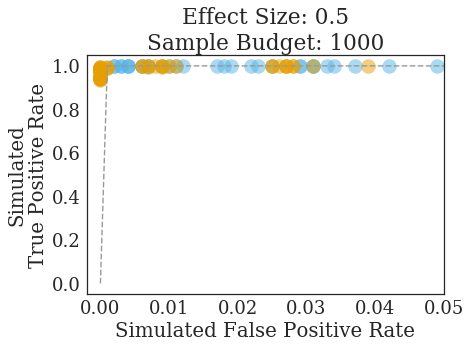

In [9]:

ind = 0

for e in sorted(set(main_df['True Effect Size'])):
    for b in sorted(set(main_df['Sample Budget'])):
       
        ind += 1
    
        plt.figure()
        sns.set(context = 'paper', font_scale = 2.25, font='serif', style = 'white')
        
        inds = (main_df['True Effect Size'] == e)
        inds &= (main_df['Sample Budget'] == b)
        inds &= (main_df['Simulated Alpha'] <= 1)
        sub = main_df[inds] 
        plt.scatter(sub['Simulated Alpha'], sub['Simulated Beta'], c = 'white', s = 200, alpha = 0.5, label = '')
 

        inds = (main_df['True Effect Size'] == e)
        inds &= (main_df['Sample Budget'] == b)
        inds &= (main_df['Simulated Alpha'] <= 1)
        sub = main_df[inds] 
        inds = np.argsort(sub['Simulated Alpha'])
        plt.plot(sub['Simulated Alpha'].iloc[inds], sub['Theoretical Power'].iloc[inds], linestyle = '--', c = '#999999', alpha = 1, label = 'Theoretical Power')

        inds = (main_df['True Effect Size'] == e)
        inds &= (main_df['Sample Budget'] == b)
        inds &= (main_df['Simulated Alpha'] <= 1)
        inds &= (main_df['Holdout'] == 0)
        sub = main_df[inds] 
        plt.scatter(sub['Simulated Alpha'], sub['Simulated Beta'], c = '#56B4E9', s = 200, alpha = 0.5, label = 'No Holdout')
        
        inds = (main_df['True Effect Size'] == e)
        inds &= (main_df['Sample Budget'] == b)
        inds &= (main_df['Simulated Alpha'] <= 1)
        inds &= (main_df['Holdout'] == 1)
        sub = main_df[inds] 
        plt.scatter(sub['Simulated Alpha'], sub['Simulated Beta'], c = '#E69F00', s = 200, alpha = 0.5, label = 'Split-Sample Design')

        
        plt.xlim((-0.002,0.05))
        plt.ylim((-0.05,1.05))
        plt.xlabel('Simulated False Positive Rate')
        plt.ylabel('Simulated\nTrue Positive Rate')
        plt.title('Effect Size: ' + str(e) + '\nSample Budget: ' + str(b))
        
        if ind == 1:
            plt.legend()
        
        plt.savefig(out_dir + 'power-' + str(ind) + '.jpg', bbox_inches = 'tight')
